In [100]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [101]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузим дата сет

In [102]:
import pandas as pd

In [103]:
file_dir = './dataset/'
train_dit_name = 'train.csv'
test_dit_name = 'test.csv'

In [104]:
train_set = pd.read_csv(file_dir+train_dit_name)
train_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Расчитаем кореляцию и перобразуем дата сет

In [105]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [106]:
def get_numers(data, sale = True):
    int_colmuns = []
    int_colmuns.extend(list(data.dtypes[data.dtypes == np.int64].index))
    int_colmuns.extend(list(data.dtypes[data.dtypes == np.float64].index))
    int_colmuns.remove('Id')
    if sale:
        int_colmuns.remove('SalePrice')
        int_colmuns.append('SalePrice')
    return pd.DataFrame(data, columns=int_colmuns)

In [107]:
train_set = get_numers(train_set)
train_set

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,8,2007,62.0,0.0,1999.0,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,0,2,2010,85.0,119.0,1978.0,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,2500,5,2010,66.0,0.0,1941.0,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,0,4,2010,68.0,0.0,1950.0,142125


нормализуем данные:

In [108]:
from sklearn.preprocessing import StandardScaler

#train_set = pd.DataFrame(StandardScaler().fit_transform(train_set), columns=train_set.columns)

In [109]:
train_set

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,8,2007,62.0,0.0,1999.0,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,0,2,2010,85.0,119.0,1978.0,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,2500,5,2010,66.0,0.0,1941.0,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,0,4,2010,68.0,0.0,1950.0,142125


<Axes: >

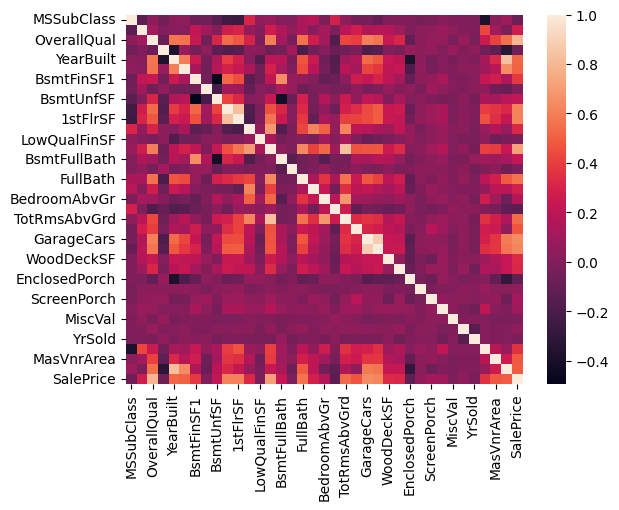

In [110]:
cor  = train_set.corr()
import seaborn as sns
sns.heatmap(cor)

Hапишем dataset

In [111]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data:pd.DataFrame):
        super(MyDataset, self).__init__()
        self.data = data.to_numpy()
        self.data_len = len(self.data[0])
        
    def __getitem__(self, index):
        lable = torch.Tensor([self.data[index][self.data_len-1].astype(np.float32)])
        data = np.nan_to_num(self.data[index][0:self.data_len-1].astype(np.float32))

        return (data, lable)

    def __len__(self):
        return len(self.data)

In [112]:
train_dataset = MyDataset(train_set)

In [113]:
train_dataset[0]

(array([6.000e+01, 8.450e+03, 7.000e+00, 5.000e+00, 2.003e+03, 2.003e+03,
        7.060e+02, 0.000e+00, 1.500e+02, 8.560e+02, 8.560e+02, 8.540e+02,
        0.000e+00, 1.710e+03, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 8.000e+00, 0.000e+00, 2.000e+00, 5.480e+02,
        0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.008e+03, 6.500e+01, 1.960e+02, 2.003e+03],
       dtype=float32),
 tensor([208500.]))

Напишем dataloader:

In [114]:
batch = 16

In [115]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch, shuffle=True)

Опишем модель:

In [116]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.pipe = nn.Sequential(
            nn.Linear(36, 100),
            nn.ReLU(),

            nn.Linear(100, 200),
            nn.ReLU(),

            nn.Linear(200, 200),
            nn.ReLU(),

            nn.Linear(200, 1)
        )


    def forward(self, x):
        x = self.pipe(x)
        return x

In [117]:
model = Net().to(device)
model

Net(
  (pipe): Sequential(
    (0): Linear(in_features=36, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): ReLU()
    (6): Linear(in_features=200, out_features=1, bias=True)
  )
)

Тренировка:

In [118]:
from tqdm import tqdm

In [119]:
def train(epoch, model, optimizer, criterion, dataloader, save = False):
    model.train()
    # loop over the dataset multiple times
    for epoch in range(epoch):
        running_loss = 0.0
        for datainp in (pdbar := tqdm(dataloader)):
            inputs, labels = datainp
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()
            #print(inputs)
            # forward + backward + optimize
            outputs = model(inputs)

            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            pdbar.set_description(f'epoch: {epoch}\tloss: {running_loss:.3F}')
            #print(outputs, 'labs', labels)
            #break
        if save:
            torch.save(model, f'my_model_epoch_{epoch}.pth')
    print('Finished Training')
    model.eval()

In [120]:
epoch = 500
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.MSELoss()
training = True

if (training):
    train(epoch, model, optimizer, criterion, train_dataloader)

epoch: 139	loss: 74111606848.000	skip:0:  73%|███████▎  | 67/92 [00:00<00:00, 123.39it/s]


KeyboardInterrupt: 

Загрузка модели:

In [48]:
load = False

In [49]:
if load:
    model=(torch.load('my_model_epoch_29.pth'))

Функция проверки

In [122]:
def test(model, dataloader):
    prozent = []
    def get_prozent(out: torch.Tensor, lable: torch.Tensor):
        out = out.cpu()
        lable = lable.cpu()
        out = out.detach().numpy()[0]
        lable  = lable.detach().numpy()[0]
        return (lable - out)


    for datainp in (pdbar := tqdm(dataloader)):
        inputs, labels = datainp
        inputs = inputs.to(device)
        labels = labels.to(device)
        out = model(inputs)
        if True in torch.isnan(out):
            continue
        prozent.append(get_prozent(out, labels)[0]*100)

        pdbar.set_description(f'Midle prozent: {sum(prozent)/len(prozent)}%')
    print('Finished Testing')
    print(prozent)
    plt.plot(range(0, len(prozent)), prozent)


Midle prozent: -269224.3800951087%: 100%|██████████| 92/92 [00:00<00:00, 151.55it/s] 


Finished Testing
[-1834487.5, 2472337.5, 1986887.5, 655391.40625, 1157634.375, 98704.6875, 5648181.25, -2823167.1875, -1910751.5625, 1310160.9375, -503960.9375, -164003.125, -32921.875, 4107629.6875, 670832.8125, -3618329.6875, -6340931.25, -5456007.8125, -983090.625, 465171.875, 219073.4375, -459920.3125, -2420998.4375, -145595.3125, 1440373.4375, 1039785.9375, 2492704.6875, -10162357.8125, 344542.1875, -197312.5, -805035.9375, 3514714.0625, 1049776.5625, -1201581.25, 4889259.375, -719028.125, 768457.8125, -2531860.9375, 302638.28125, -293550.0, -5430407.8125, 4391579.6875, -5406584.375, -408728.90625, -4241700.0, 943446.875, -3296110.9375, 7697646.875, 2291776.5625, 927459.375, -205474.21875, 534978.125, -3249921.875, -2800950.0, -427551.5625, -1038164.0625, -1181892.1875, -5310232.8125, 250267.1875, 680400.0, 669698.4375, -2977850.0, 2182754.6875, -6783720.3125, 3576745.3125, 2423018.75, -3026175.0, -2522604.6875, 545004.6875, -433529.6875, -2698296.875, -2466848.4375, 3850148.4375,

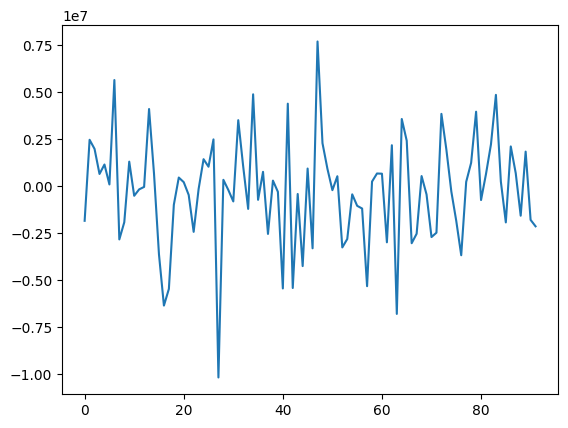

In [123]:
test(model, train_dataloader)

вывод:

In [140]:
test_set = pd.read_csv(file_dir+test_dit_name)
test_set = get_numers(test_set, False)

In [141]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        super(TestDataset, self).__init__()
        self.data = data.to_numpy()

    def __getitem__(self, index):
        return (np.nan_to_num(self.data[index]), 0)

    def __len__(self):
        return len(self.data) 

In [142]:
test_dataset = TestDataset(test_set)
test_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=False)

In [143]:
def submission(model, dataloader):
    out_sub = []
    id=[]
    id_start = 1461
    for datainp in enumerate(dataloader):
        inputs, labels = datainp[1]
        inputs = inputs.to(device)
        labels = labels.to(device)
        out = model(inputs)

        id.append(id_start+datainp[0])

        out_sub.append(torch.nan_to_num(out, nan = 150000.).cpu().detach().numpy()[0][0])
    out_sub = pd.DataFrame({'Id':id, 'SalePrice':out_sub})
    return out_sub

In [144]:
out = submission(model, test_dataloader)
print(out)

        Id      SalePrice
0     1461  206941.765625
1     1462  172732.625000
2     1463  212465.046875
3     1464  158310.015625
4     1465  274572.875000
...    ...            ...
1455  2916  171264.734375
1456  2917  217867.656250
1457  2918  230732.546875
1458  2919  157511.203125
1459  2920  183683.312500

[1460 rows x 2 columns]


In [145]:
out.to_csv('sample_submission.csv',index=False)